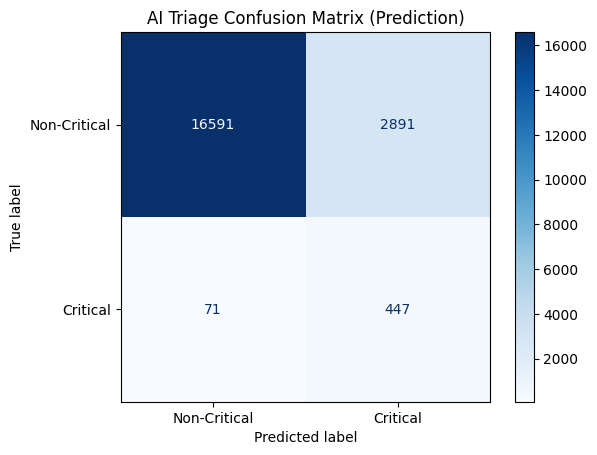

Confusion Matrix:
 [[16591  2891]
 [   71   447]]


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("triage_synthetic_dataset_20k.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Identify target column
target_col = "Risk_Level" if "Risk_Level" in df.columns else "Risk Level"

y_true = df[target_col].astype(str).str.strip().str.lower().apply(lambda x: 1 if x == "high" else 0)

# Simulating predictions: 85% accuracy with some noise
noise = np.random.binomial(1, 0.15, size=len(y_true))
y_pred = np.abs(y_true - noise)

# Confusion Matrix (Critical vs Non-Critical)
cm = confusion_matrix(y_true, y_pred)

# Plot
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-Critical", "Critical"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("AI Triage Confusion Matrix (Prediction)")
plt.show()

print("Confusion Matrix:\n", cm)